CT475-Assignment-2 Source code accompaniment
----------------------
__________________________

Decision Tree and Logistic Regression Learning Curves
-----------------------

__________________________

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle

%matplotlib inline

In [2]:
df = pd.read_csv('./illness.txt' , header = None).transpose()

In [3]:
df.columns = ['plasmaglucose', 'bp' , 'test_result', 'skin_thickness', 'num_pregnancies', 'insulin' , 'bmi', 'pedigree', 'age']
df[['skin_thickness']] = df[['skin_thickness']].astype(float)
df[['insulin']] = df[['insulin']].astype(float)
df[['plasmaglucose']] = df[['plasmaglucose']].astype(float)
df[['bmi']] = df[['bmi']].astype(float)
df[['skin_thickness']] = df[['skin_thickness']].astype(float)
df[['num_pregnancies']] = df[['num_pregnancies']].astype(float)
df[['age']] = df[['age']].astype(float)
df[['pedigree']] = df[['pedigree']].astype(float)
df[['bp']] = df[['bp']].astype(float)
df.head(1)

dfEncode = df['test_result']
binaryEncoded = []
for d in dfEncode : 
    if(d == 'positive'):
        binaryEncoded.append(1)
    else : 
        binaryEncoded.append(0)
        
binaryEncodedDF = pd.DataFrame(binaryEncoded)
binaryEncodedDF.columns = ['test_result-encoded']
binaryEncodedDF.head(5)

concatDF = pd.concat([df, binaryEncodedDF], axis=1)
concatDF.head(5)

featureNames = ['plasmaglucose','bp','skin_thickness','num_pregnancies','insulin','bmi','pedigree','age']

X = concatDF[featureNames].as_matrix()
Y = concatDF[['test_result-encoded']].as_matrix()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Train Decision Tree classifier
----------------------

In [4]:
decisionTreeClassifier = DecisionTreeClassifier(criterion='entropy' , random_state=0)
decisionTreeClassifier = decisionTreeClassifier.fit(X_train, Y_train)

Plot classification accuracy on a held-out test set as a function of training dataset size.
--------------------

Define Learning Curve 
-------------------
Amended from src : http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [5]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


Automatically created module for IPython interactive environment


Shuffle test data set into folds
----------------------

Print index locations for each fold.

In [6]:
cvVal = ShuffleSplit(n_splits=4, train_size=0.75, test_size=0.25, random_state=0)

for train_index, test_index in cvVal.split(X_test):
    print("\nTRAIN:", train_index, "\nTEST:", test_index)


TRAIN: [56  6 50 69  4 66 48  2 45 62 11 30  3 63 10 31 38 55  1 32 73 14 42 19 29
 61 35 18  0 74 15  5 53 16 51 20 70  8 13 25 37 17 24 46 23 39 65 58 12 36
 21  9 72 67 64 47 44] 
TEST: [52 57 22 75 28 26 71 54 34  7 43 59 41 40 33 68 27 49 60]

TRAIN: [ 8 11 37  4  1 55 33 67 17 65 32 14 18 45 50 44  2 63 10 57  9 59 39 61 73
 69 70 29 34 36 60 30 56 31  0 35 41  5 49 48 21 75 13 66 23 58 20 15 52  3
 47 72  6 68 42 12 53] 
TEST: [ 7 24 27 64 74 51 43 22 19 26 40 46 25 62 71 38 16 54 28]

TRAIN: [ 5 28 44 30 10 27 59 37  3 34 39 12 62 42  1 54 58 38 18 15 55  7 68 31 53
  6 36 32 74 33 73 63 25 46 21 29 24 16 56 64 45 57 75 22 60 11  4 14 61 67
 52 66 26 19 72 40 13] 
TEST: [70 41 17  9 69 48 47 20  2 51 49 50 43 23 65  8 71  0 35]

TRAIN: [60 59 15 28 57 37 12 38 55  2 20 51 49 18 75 30 65 25 48 61 73 17  1  8 16
 66 53 11  0 36 40  5 56 24 54 34 44 33 21 72  7 45 27 10 71 31 68 50 46  3
 23 41  9 39 35 67 29] 
TEST: [42  4 43 13 47 14 69 62 26 63 70 58 32 52 22 19  6 64 74]


Decision Tree Learning Curve
------------------

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

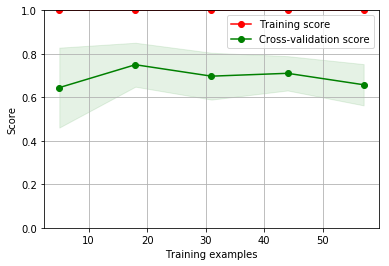

In [7]:
plot_learning_curve(decisionTreeClassifier, '',X_test,Y_test.ravel(), (0, 1), cv=cvVal)

Logistic Regression - shuffle
------------------

There appears to exist a bug in the logistic regression classifier where if a fold does not contain all class labels the classifier returns an error while executing. As a work around to this bug shuffle the data prior to using the classifier. 

Note in order to generate a shuffle where all labels contained in each fold may need to run below cells multiple times.

Further details : 

https://stackoverflow.com/questions/38138067/valueerror-this-solver-needs-samples-of-at-least-2-classes-in-the-data-but-the 

https://github.com/lensacom/sparkit-learn/issues/49 


In [10]:
X_shuf, Y_shuf = shuffle(X_test, Y_test)

logistic = linear_model.LogisticRegression(C=1e5 , random_state=0)
logistic.fit(X_shuf, Y_shuf.ravel())

cvValLog = ShuffleSplit(n_splits=4, train_size=0.75, test_size=0.25, random_state=0)

Logistic Regression learning curve
--------------

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

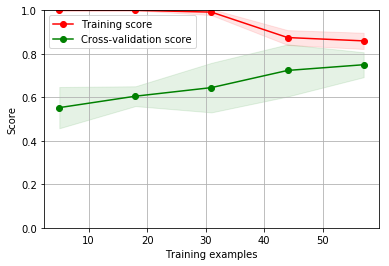

In [11]:
plot_learning_curve(logistic, '',X_shuf, Y_shuf.ravel(), (0, 1), cv=cvValLog)

Assignment End
-------------------